### Summary:
In this assignment, you will work with the MNIST dataset to analyze and manipulate image data. You will preprocess the dataset, generate unique identifiers for each image, and explore feature extraction techniques. I have implemented an pixel counting based number classifier. you can enhance accuraccy by implementing **zoning** and **shape descriptors** to extract meaningful features from the images. These techniques will help you understand how to represent image data effectively for machine learning tasks.



In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

In [11]:
# Load the dataset into a pandas dataframe
train_df = pd.read_csv('train.csv')
validate_df = pd.read_csv('validate.csv')


In [12]:
# Display first few rows of the dataset
print("Train Data Head:")
print(train_df.head())
# Each row in the data set contains a label and a flattend 28x28 pixel image of a digit. 

Train Data Head:
   5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0  8  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  7  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


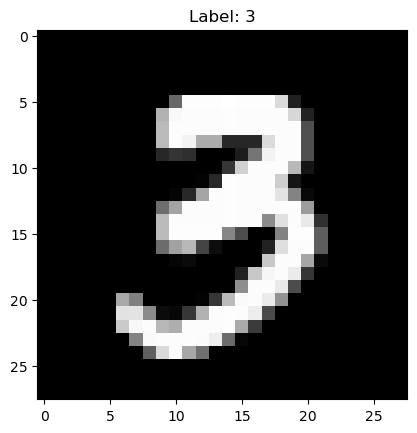

In [13]:
# Convert a row to an image
def show_image(image_row, label=None):
    image = image_row.to_numpy().reshape(28, 28)
    plt.imshow(image, cmap='gray')
    if label is not None:
        plt.title(f"Label: {label}")
    plt.show()

# display the ith image in the dataset
i = 30

show_image(train_df.iloc[i, 1:], train_df.iloc[i, 0])    

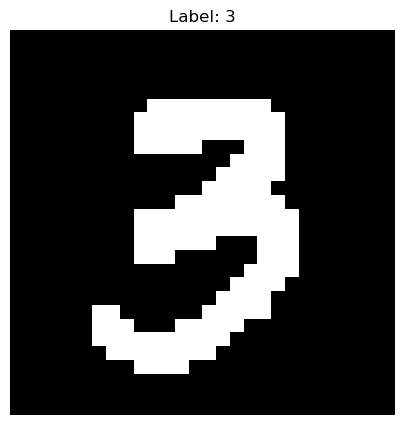

In [14]:
# Apply threshold to the images to convert them to binary (black and white)

def apply_threshold(image_row, threshold=100):
    return (image_row > threshold).astype(int)

# Display the i-th thresholded image
i = 30  # Specify the index of the image to display
image = train_df.iloc[i, 1:]  # Extract pixel data for the i-th image
label = train_df.iloc[i, 0]  # Extract the label for the i-th image

thresholded_image = apply_threshold(image.values, threshold=100)  # Apply threshold

plt.figure(figsize=(5, 5))
plt.imshow(thresholded_image.reshape(28, 28), cmap='gray')  # Reshape and display
plt.title(f"Label: {label}")  # Set title with label
plt.axis('off')  # Turn off axes for better visualization
plt.show()

### Explanation of the Code

In the below code, we analyze the pixel intensity of images in the `train_df` dataset by converting them to binary (black and white) using a threshold value of 100. Here's a breakdown of what we have done and why:

1. **Binary Conversion**:
   - Each pixel value in the dataset is compared to a threshold of 100.
   - Pixels with values greater than 100 are converted to 1 (white), and others are converted to 0 (black).
   - This simplifies the image data and allows us to focus on the presence of significant pixel intensities.

2. **Counting White Pixels**:
   - For each image, we count the number of white pixels (ones) after the binary conversion.
   - This count is added as a new column (`ones_count`) in the dataset, representing the brightness or density of white pixels in each image.

3. **Visualization**:
   - We group the data by labels (digits) and plot smoothed histograms (Kernel Density Estimation, KDE) for the `ones_count` of each label.
   - These KDE plots help us visualize the distribution of white pixel counts for each digit and identify patterns or differences between labels.
   - **Purpose**: By analyzing these plots, we can estimate the margins or ranges of `ones_count` for each label. These margins can later be used to differentiate between digits based on their pixel intensity distributions.

### Why This is Useful:
- **Feature Extraction**: The count of white pixels can serve as a simple feature for distinguishing between digits.
- **Finding Margins**: The KDE plots allow us to observe overlaps or separations between the distributions of different labels, helping us define thresholds or margins for classification.
- **Visualization**: The KDE plots provide insights into how the pixel intensity distributions vary across different digits, aiding in understanding the dataset and designing better models.

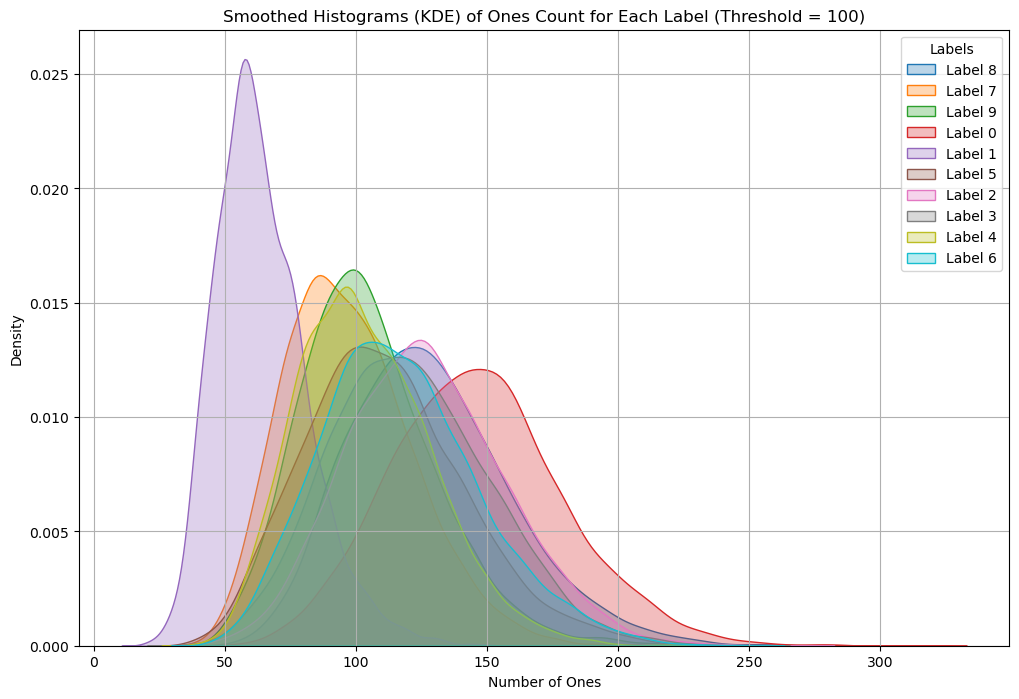

In [15]:
import seaborn as sns

# Convert the pixel values to black and white using a threshold of 100
def count_ones(image_row, threshold=100):
    binary_image = (image_row > threshold).astype(int)  # Convert to binary (0 or 1)
    return binary_image.sum()  # Count the number of ones (white pixels)

# Apply the function to count ones for each image in the dataset
train_df['ones_count'] = train_df.iloc[:, 1:].apply(lambda image: count_ones(image, threshold=100), axis=1)

# Group the data by label and plot smooth histograms (KDE) in a single plot
labels = train_df.iloc[:, 0].unique()  # Get unique labels
colors = sns.color_palette("tab10", len(labels))  # Generate distinct colors for each label

plt.figure(figsize=(12, 8))  # Create a single plot

for idx, label in enumerate(labels):
    label_data = train_df[train_df.iloc[:, 0] == label]['ones_count']  # Filter data for the current label
    sns.kdeplot(label_data, color=colors[idx], label=f'Label {label}', fill=True, alpha=0.3)  # Smooth KDE plot

plt.title('Smoothed Histograms (KDE) of Ones Count for Each Label (Threshold = 100)')
plt.xlabel('Number of Ones')
plt.ylabel('Density')
plt.legend(title='Labels')
plt.grid()
plt.show()

In [20]:
import numpy as np

# Define the dominant ranges for each label
dominant_ranges = {
    0: (302.53, 350.00),
    1: (00.00, 77.17),
    2: (121.11, 134.98),
    4: (114.31, 115.20),
    6: (113.02, 116.68),
    7: (77.17, 92.05),
    8: (116.68, 302.71),
    9: (92.05, 113.02)
    # Labels 3 and 5 have no clear dominant range
}

def predict_label_from_row(image_row, threshold=100):
    # Convert the row to binary (black and white)
    binary_img = (image_row > threshold).astype(int)  # Thresholding
    ones_count = binary_img.sum()  # Count the number of ones (white pixels)

    # Predict the label based on the dominant ranges
    for label, (min_range, max_range) in dominant_ranges.items():
        if min_range <= ones_count <= max_range:
            return label

    return "No matching label found"


# Example usage with validate_df
i=57
test_row = validate_df.iloc[i, 1:]  # Replace with the row of pixel data from validate_df
actual_label = validate_df.iloc[i, 0]  # Get the actual label from the first column
predicted_label = predict_label_from_row(test_row, threshold=100)

print(f"Actual Label: {actual_label}, Predicted Label: {predicted_label}")

Actual Label: 9, Predicted Label: 9


Now we have found our margins we test this on validation data to find the accuraccy of our basic model

In [21]:
# Calculate classification accuracy
correct_predictions = 0
total_predictions = len(validate_df)

for index, row in validate_df.iterrows():
    actual_label = row.iloc[0]  # The actual label is in the first column
    pixel_data = row.iloc[1:]  # The pixel data starts from the second column
    predicted_label = predict_label_from_row(pixel_data, threshold=100)
    
    if predicted_label == actual_label:
        correct_predictions += 1

accuracy = (correct_predictions / total_predictions) * 100
print(f"Classification Accuracy: {accuracy:.2f}%")

Classification Accuracy: 20.32%


In order to improve accuracy you can use Zoning and Shape Descriptors:
1. **Zoning**: Divide each image into smaller regions (zones) and calculate the pixel density in each zone. This provides a compact representation of the image by summarizing local pixel distributions.
2. **Shape Descriptors**: Extract features such as the aspect ratio, symmetry, centroid, or bounding box of the digit. These features capture the overall structure and geometry of the digit, which can be useful for classification.

These methods will allow you to go beyond raw pixel values and create more robust features for digit recognition. 

In [22]:
### Preparing file for kaggle submission ###
test_df = pd.read_csv('test.csv')

# Prepare a list to store submission rows
submission_data = []

# Iterate through test_df to predict labels
for index, row in test_df.iterrows():
    image_id = row['image_id']  # Read the image ID
    pixel_data = row.iloc[1:]  # Read the pixel data 
    predicted_label = predict_label_from_row(pixel_data, threshold=100)
    submission_data.append({'ID': image_id, 'Label': predicted_label})

submission = pd.DataFrame(submission_data)

# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Kaggle submission file 'submission.csv' created successfully.")

Kaggle submission file 'submission.csv' created successfully.
